<a href="https://colab.research.google.com/github/ZiyueNie/FM/blob/master/src/GLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import pandas as pd
import math
from scipy import stats

In [100]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 529 (delta 7), reused 0 (delta 0), pack-reused 499
Receiving objects: 100% (529/529), 814.27 KiB | 8.75 MiB/s, done.
Resolving deltas: 100% (207/207), done.


In [101]:
cd 19ma573ZiyueNie/src/


/content/19ma573ZiyueNie/src/19ma573ZiyueNie/src/19ma573ZiyueNie/src/19ma573ZiyueNie/src


In [102]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_A = pd.read_csv('GLD year 1.csv')

print('>>>>>> data')
print(Data_A)

>>>>>> data
           Date   Adj Close
0      2017/9/8  127.970001
1     2017/9/11  126.190002
2     2017/9/12  126.559998
3     2017/9/13  125.610001
4     2017/9/14  126.160004
5     2017/9/15  125.529999
6     2017/9/18  124.360001
7     2017/9/19  124.620003
8     2017/9/20  123.620003
9     2017/9/21  122.680000
10    2017/9/22  123.239998
11    2017/9/25  124.529999
12    2017/9/26  123.139999
13    2017/9/27  121.980003
14    2017/9/28  122.209999
15    2017/9/29  121.580002
16    2017/10/2  120.769997
17    2017/10/3  120.830002
18    2017/10/4  121.169998
19    2017/10/5  120.519997
20    2017/10/6  121.089996
21    2017/10/9  122.080002
22   2017/10/10  122.400002
23   2017/10/11  122.790001
24   2017/10/12  122.889999
25   2017/10/13  123.820000
26   2017/10/16  122.970001
27   2017/10/17  122.129997
28   2017/10/18  121.669998
29   2017/10/19  122.389999
..          ...         ...
222   2018/7/27  115.830002
223   2018/7/30  115.650002
224   2018/7/31  115.989998
225    2

Problem3

In [103]:
log_return=[]
price = Data_A['Adj Close']
log_price=np.log(price)
for i in range(len(log_price)-1):
  log_return.append(log_price[i+1]-log_price[i])
print(log_return)


[-0.014007145749900474, 0.0029277647026262343, -0.007534611556250681, 0.004369097700241298, -0.005006208496658893, -0.009364172632169598, 0.0020885379575341645, -0.008056762690213048, -0.007633029252994028, 0.004554318253918943, 0.010412985202893132, -0.011224731340637284, -0.009464789899720216, 0.0018837468047667727, -0.005168369496622027, -0.0066846133239728545, 0.000496730144719848, 0.0028098861462977354, -0.005378812367728969, 0.00471834836302687, 0.008142546185853305, 0.0026178024992482563, 0.0031812008983127527, 0.0008140508427398885, 0.007539259931938602, -0.006888466774665147, -0.006854404697413052, -0.0037735812575556693, 0.005900213862193304, -0.006393448007728786, 0.0015611686904213329, -0.003866257358587255, 0.00016479314360751118, -0.008440930620327691, 0.0047257890923138035, 0.0019005500985871393, -0.003804793750550317, 0.003639701278534524, 0.000660346693492464, -0.004714445589070415, 0.008502952775802264, -0.0036235154378632117, 0.0034590547331010413, 0.0041024016536299

In [104]:
mean=np.mean(log_return)
print(mean)
std=np.std(log_return)
print(std)


-0.00048754858343881573
0.006084190551592926


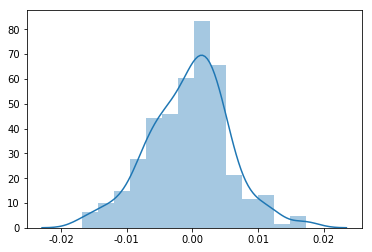

In [105]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
sns.distplot(log_return)
plt.show()

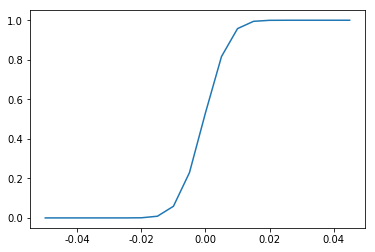

In [106]:

x = np.arange(-0.05, 0.05, 0.005)

y = stats.norm.cdf(x, -0.00048754858343881573, 0.006084190551592926)

plt.plot(x, y)

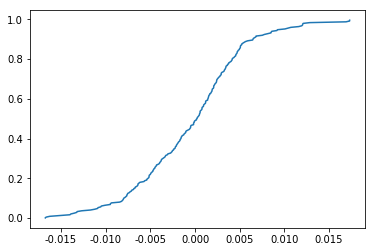

In [107]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

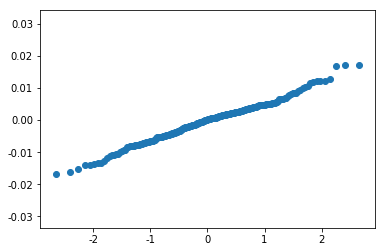

In [108]:
x_label = stats.norm.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for normal distribution 


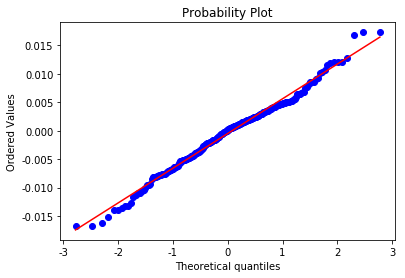

In [109]:
stats.probplot(log_return, dist="norm", plot=plt)
print('QQ plot for normal distribution ')
plt.show()

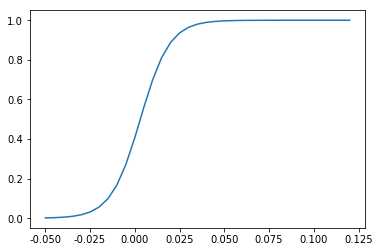

In [110]:
x = np.arange(-0.05, 0.125, 0.005)

y = stats.logistic.cdf(x, 0.0030732843, 0.0081693432)

plt.plot(x, y)

Problem4

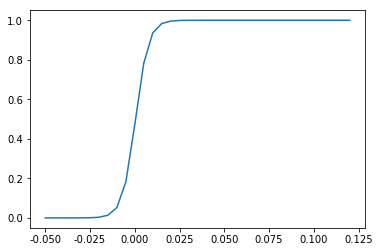

In [111]:
x = np.arange(-0.05, 0.125, 0.005)

y = stats.logistic.cdf(x, 0.0003914261, 0.0035969053)

plt.plot(x, y)

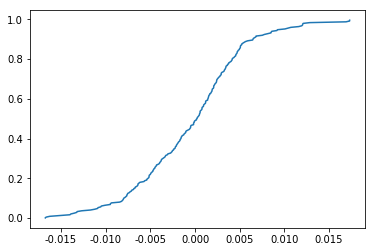

In [112]:
sorted_ = np.sort(log_return)
yvals = np.arange(len(sorted_))/float(len(sorted_))
plt.plot(sorted_, yvals)

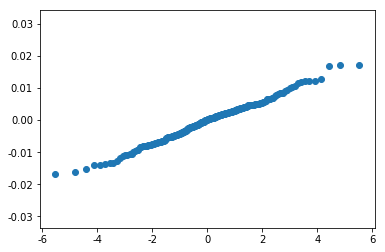

In [113]:
x_label = stats.logistic.ppf(yvals)
plt.scatter(x_label, sorted_)

QQ plot for logistic distribution


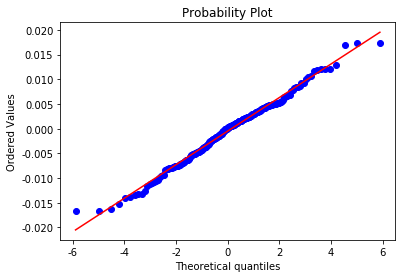

In [114]:
stats.probplot(log_return, dist="logistic", plot=plt)
print('QQ plot for logistic distribution')
plt.show()

problem 7

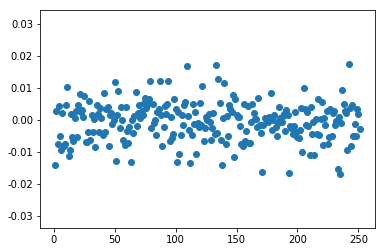

In [115]:
x=np.linspace(1,251,251)
y=log_return
plt.scatter(x,y)

In [116]:
out=log_return-np.mean(log_return)
sort_out=np.sort(out)
for i in [0,1,2,248,249,250]:
  print(sort_out[i])

-0.01627907966132812
-0.016184961333999923
-0.01579005090148565
0.017396401888001747
0.017793335489006537
0.017805590439933475


In [117]:
x1=0.017805590439933475+np.mean(log_return)
y1 = 1-stats.norm.cdf(x1, -0.00048754858343881573, 0.006084190551592926)
print(y1)
x2=0.017793335489006537+np.mean(log_return)
y2 = 1-stats.norm.cdf(x2, -0.00048754858343881573, 0.006084190551592926)
print(y2)
x3=0.017396401888001747+np.mean(log_return)
y3 = 1-stats.norm.cdf(x3, -0.00048754858343881573, 0.006084190551592926)
print(y3)

0.0017138102541003342
0.001724940882206094
0.0021230218277333845


Problem8

In [118]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'norm',(-0.00048754858343881573, 0.006084190551592926))






KstestResult(statistic=0.05387487872126073, pvalue=0.4495580842737577)

If we choose alpha=0.05,since p-value=0.45>0.05, then we accept that the data is normal distribution

In [119]:
from scipy.stats import kstest
sorted= np.sort(log_return)
kstest(sorted, 'logistic',( 0.0003914261, 0.0035969053))

KstestResult(statistic=0.08683189247181256, pvalue=0.042731367097125855)

If we choose alpha=0.05,since p-value=0.04<0.05, then we reject that the data is logistic distribution

In [120]:
'''from scipy.stats import normaltest
x = np.random.randn(10, 20)
normaltest(x, axis=None)
'''

'from scipy.stats import normaltest\nx = np.random.randn(10, 20)\nnormaltest(x, axis=None)\n'

In [121]:
'''mean=np.mean(log_return)
print(mean)
std=np.std(log_return)
print(std)
n=252

se=std/np.sqrt(n)
print(se)
norm_mean= ???

t=(mean-norm_mean)/se'''

'mean=np.mean(log_return)\nprint(mean)\nstd=np.std(log_return)\nprint(std)\nn=252\n\nse=std/np.sqrt(n)\nprint(se)\nnorm_mean= ???\n\nt=(mean-norm_mean)/se'

Problem 9

In [122]:
'''======
Read data
========='''
#Read two-column data
#columns are date,adjusted closing price
Data_B = pd.read_csv('GLD year 2.csv')

print('>>>>>> data')
print(Data_B)

>>>>>> data
           Date   Adj Close
0     2018/9/10  113.150002
1     2018/9/11  113.220001
2     2018/9/12  114.169998
3     2018/9/13  113.760002
4     2018/9/14  113.019997
5     2018/9/17  113.610001
6     2018/9/18  113.440002
7     2018/9/19  113.879997
8     2018/9/20  114.269997
9     2018/9/21  113.489998
10    2018/9/24  113.470001
11    2018/9/25  113.650002
12    2018/9/26  113.050003
13    2018/9/27  112.050003
14    2018/9/28  112.760002
15    2018/10/1  112.570000
16    2018/10/2  113.870003
17    2018/10/3  113.419998
18    2018/10/4  113.480003
19    2018/10/5  113.800003
20    2018/10/8  112.540001
21    2018/10/9  112.599998
22   2018/10/10  112.879997
23   2018/10/11  115.779999
24   2018/10/12  115.230003
25   2018/10/15  116.000000
26   2018/10/16  115.800003
27   2018/10/17  115.790001
28   2018/10/18  115.919998
29   2018/10/19  116.010002
..          ...         ...
220   2019/7/26  133.639999
221   2019/7/29  134.529999
222   2019/7/30  134.979996
223   20

In [123]:
log_return_2=[]
price_2 = Data_B['Adj Close']
log_price_2=np.log(price_2)
for i in range(len(log_price_2)-1):
  log_return_2.append(log_price_2[i+1]-log_price_2[i])
print(log_return_2)


[0.0006184476856772037, 0.008355710729623489, -0.003597564534696396, -0.006526215978079897, 0.0052067717261330415, -0.0014974589695730955, 0.0038711556520345525, 0.003418806838695332, -0.006849333214662856, -0.00017621607454909594, 0.0015850742806398088, -0.005293342635530607, -0.008884998240212383, 0.006316456962000672, -0.0016864336159851945, 0.011482222801634023, -0.003959748216039394, 0.0005289114247197801, 0.0028159116772421555, -0.011133825163406996, 0.0005329750527387489, 0.0024835830240617085, 0.025366549046125897, -0.004761672952978913, 0.00666003404555493, -0.0017256000607339672, -8.637678512446456e-05, 0.0011220664986426598, 0.0007761307680596019, -0.002589359281257586, 0.0058595601161304245, 0.0023171432510835643, -0.0022312031336966243, 0.0031736099166250753, -0.003947139240572106, -0.004394432109890545, -0.005628947410286855, 0.012770861345244633, 0.00017151063215692375, -0.002403219712920013, -0.0028398280289039235, -8.61981299280501e-05, -0.0021569397272047652, -0.01129

In [124]:

sorted_2= np.sort(log_return_2)
kstest(sorted_2, 'norm',(-0.00048754858343881573, 0.006084190551592926))


KstestResult(statistic=0.09068638923760397, pvalue=0.031215282168858594)

If we choose alpha=0.05,since p-value=0.0312<0.05, then we  reject that the data is normal distribution

In [125]:
kstest(sorted_2, 'logistic',( 0.0003914261, 0.0035969053))

KstestResult(statistic=0.049691280773178526, pvalue=0.5659555965682427)

If we choose alpha=0.05,since p-value=0.566>0.05, then we cannot reject that the data is logistic distribution

In [126]:
out_2=log_return_2-np.mean(log_return_2)
sort_out_2=np.sort(out_2)
for i in [0,1,2,246,247,248]:
  print(sort_out_2[i])

-0.025203680417399652
-0.02046926519029627
-0.018073807360346392
0.022828367114351402
0.023956325710421802
0.024456713244063146


In [128]:
x1=np.mean(log_return_2)-0.025203680417399652
y1 = stats.logistic.cdf(x1, 0.0003914261, 0.0035969053)
print(y1)
x2=np.mean(log_return_2)+0.024456713244063146
y2 = 1-stats.logistic.cdf(x2, 0.0003914261, 0.0035969053)
print(y2)
x3=np.mean(log_return_2)+0.023956325710421802
y3 = 1-stats.logistic.cdf(x3, 0.0003914261, 0.0035969053)
print(y3)

0.001044763656417931
0.0009639535247257802
0.001107671499048113
